# Face emotion detection
## Data Loading

In [7]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

# Define image size
IMAGE_SIZE = 48

# Load and preprocess images
def load_data(data_dir):
    categories = ['angry', 'fear', 'disgust', 'happy', 'neutral', 'sad', 'surprise']
    data = []
    labels = []
    
    for label, category in enumerate(categories):
        folder_path = os.path.join(data_dir, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
            data.append(image)
            labels.append(label)
    
    data = np.array(data) / 255.0  # Normalize pixel values
    labels = to_categorical(labels, num_classes=len(categories))  # One-hot encoding
    return np.array(data), np.array(labels)

train_data, train_labels = load_data(r"D:\NLP\FED\fer2013\train")
test_data, test_labels = load_data(r"D:\NLP\FED\fer2013\test")


# Model Train

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes for emotions
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=20, batch_size=32)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 160s 175ms/step - accuracy: 0.2749 - loss: 1.7731 - val_accuracy: 0.4047 - val_loss: 1.5276
Epoch 2/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 177s 147ms/step - accuracy: 0.4129 - loss: 1.5151 - val_accuracy: 0.4551 - val_loss: 1.3946
Epoch 3/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 131s 146ms/step - accuracy: 0.4573 - loss: 1.4115 - val_accuracy: 0.4816 - val_loss: 1.3326
Epoch 4/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 132s 147ms/step - accuracy: 0.4719 - loss: 1.3654 - val_accuracy: 0.5008 - val_loss: 1.2890
Epoch 5/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 144s 160ms/step - accuracy: 0.5028 - loss: 1.3156 - val_accuracy: 0.5159 - val_loss: 1.2580
Epoch 6/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 134s 149ms/step - accuracy: 0.5148 - loss: 1.2636 - val_accuracy: 0.5290 - val_loss: 1.2368
Epoch 7/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 134s 149ms/step - accuracy: 0.5309 - loss: 1.2283 - val_accuracy: 0.5294 - val_loss: 1.2381
Epoch 8/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 134s 150ms/step - accuracy: 0.5477 -

In [9]:
# Access the history object
history = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=20, batch_size=32)

# training and validation metrics
print(history.history)  # Dictionary of metrics


Epoch 1/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 139s 154ms/step - accuracy: 0.6544 - loss: 0.9143 - val_accuracy: 0.5560 - val_loss: 1.1888
Epoch 2/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 151s 164ms/step - accuracy: 0.6629 - loss: 0.8879 - val_accuracy: 0.5621 - val_loss: 1.2048
Epoch 3/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 131s 145ms/step - accuracy: 0.6669 - loss: 0.8787 - val_accuracy: 0.5645 - val_loss: 1.1974
Epoch 4/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 150s 154ms/step - accuracy: 0.6727 - loss: 0.8561 - val_accuracy: 0.5605 - val_loss: 1.2049
Epoch 5/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 140s 152ms/step - accuracy: 0.6767 - loss: 0.8545 - val_accuracy: 0.5639 - val_loss: 1.2169
Epoch 6/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 134s 149ms/step - accuracy: 0.6747 - loss: 0.8542 - val_accuracy: 0.5631 - val_loss: 1.2154
Epoch 7/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 140s 156ms/step - accuracy: 0.6731 - loss: 0.8434 - val_accuracy: 0.5658 - val_loss: 1.2121
Epoch 8/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 137s 150ms/step - accuracy: 0.6912 -

# Visualization:

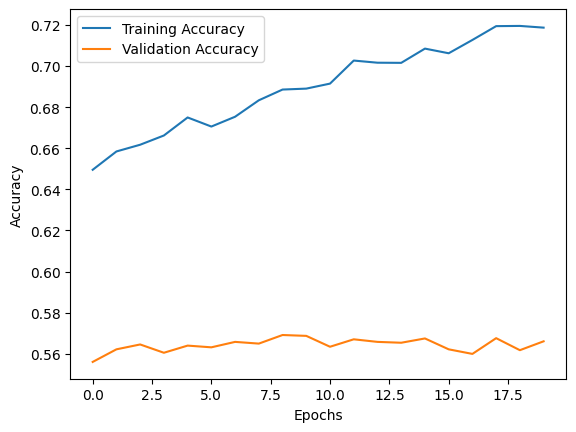

In [36]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Model Save

In [37]:
# Save the model with .keras extension
model.save("D:/NLP/FED/emotion_detection_model.keras")
# Save the model

In [38]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("D:/NLP/FED/emotion_detection_model.keras")
print("Model loaded successfully!")

Model loaded successfully!


In [39]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.4942 - loss: 1.4235
Test Accuracy: 56.60%


In [40]:
import numpy as np

# Predict emotion for a single input
sample_data = test_data[0:1]  # Select a single sample
predicted_label = np.argmax(model.predict(sample_data))

categories = ['angry', 'fear', 'disgust', 'happy', 'neutral', 'sad', 'surprise']
print(f"Predicted Emotion: {categories[predicted_label]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Predicted Emotion: neutral


In [41]:
print("Expected input shape:", model.input_shape)


Expected input shape: (None, 48, 48, 1)


In [42]:
gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
resized_frame = cv2.resize(gray_frame, (48, 48))     # Resize to 48x48
processed_frame = np.expand_dims(resized_frame, axis=(0, -1)) / 255.0  # Add batch and channel dimensions


In [43]:
print("Processed frame shape:", processed_frame.shape)


Processed frame shape: (1, 48, 48, 1)


In [44]:
processed_frame = processed_frame.astype('float32')


In [45]:
import tensorflow as tf
print(tf.__version__)  # Should print the installed TensorFlow version


2.16.1


# Real time Face emotion

In [46]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("emotion_detection_model.keras")

# Define emotion categories
categories = ['angry', 'fear', 'disgust', 'happy', 'neutral', 'sad', 'surprise']

# Define image size
IMAGE_SIZE = 48

# Function to preprocess frame
def preprocess_frame(frame):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    resized_frame = cv2.resize(gray_frame, (IMAGE_SIZE, IMAGE_SIZE))  # Resize to 48x48
    processed_frame = np.expand_dims(resized_frame, axis=(0, -1)) / 255.0  # Add batch and channel dimensions
    processed_frame = processed_frame.astype('float32')  # Ensure correct data type
    return processed_frame

# Open the webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame")
        break

    # Preprocess the frame
    processed_frame = preprocess_frame(frame)  # Shape: (1, 48, 48, 1)

    # Predict emotion
    prediction = model.predict(processed_frame)  # No need for np.expand_dims
    emotion = categories[np.argmax(prediction)]

    # Display the emotion on the video feed
    cv2.putText(frame, emotion, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow("Real-Time Emotion Detection", frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    if cv2.getWindowProperty("Real-Time Emotion Detection", cv2.WND_PROP_VISIBLE) < 1:
        break


# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━